<a href="https://colab.research.google.com/github/ethanmacrae/load-shortfall-regression-predict-api/blob/master/Predict%20Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Predict Student Solution

© Explore Data Science Academy

##Introduction

As the global energy production shifts toward favouring the use of renewable energy sources, several issues have begun to arise. Renewable sources of energy are often impacted by weather conditions, which may lead to a shortfall of elecricity supply. As a result, it becomes imperative to predict these shortfall occurences as to allow for adequate preparation. This preparation often involves supplementing the electricity grid with standard fossil fuel sources. It is also incredibly important in our journey to further our understanding of renewable energy sources as a primary source of electricity as we move into a greener future. 

We have used data from Spains' electricity monitoring program, which tracks the shortfall between the energy generated by means of fossil fuels and various renewable sources with respect to weather conditions. We have sought to develop a prediction model which attempts to predict the shortfall of electricity (our target variable) based on the weather conditions provided in the dataset.  








### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

### Problem Statement

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

In this section we are importing all the relavant packages which will be used for analysis and modeling.

In [ ]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Libraries for data preparation and model building

# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Import train/test split module
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn import decomposition
from sklearn.model_selection import RepeatedKFold

from sklearn.pipeline import Pipeline
from sklearn import linear_model
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

 Loading the data to be used for exploratory data snd model builing and analysis.


In [ ]:
df = pd.read_csv("df_train.csv")
df_test = pd.read_csv("df_test.csv")
pd.set_option('display.max_columns', None)
df.shape,df_test.shape

((8763, 49), (2920, 48))

In [ ]:
df.head(2)

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.0,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.0,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667


In [ ]:
df_test.head(2)

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.0,71.333333,20.0,3.000000,0.0,193.333333,4.000000,176.666667,0.0,1.000000,0.0,sp25,0.0,0,1017.333333,0.0,0.0,0.0,0,800.0,800.000000,1025.666667,800.0,NaN,284.483333,1030.000000,287.483333,287.483333,801.0,283.673333,46.333333,287.483333,287.816667,280.816667,287.356667,276.150000,280.38,286.816667,285.15,283.15,279.866667,279.15
1,8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.0,78.000000,0.0,3.666667,0.0,143.333333,4.666667,266.666667,0.0,0.666667,0.0,sp25,0.0,0,1020.333333,0.0,0.0,0.0,0,800.0,800.333333,1026.666667,800.0,NaN,282.483333,1030.333333,284.150000,284.150000,721.0,281.673333,53.666667,284.150000,284.816667,280.483333,284.190000,277.816667,281.01,283.483333,284.15,281.15,279.193333,278.15


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


  Data Preparation with Regression

This section provides an indepth EDA which allowed us to gain deeper insights into the dimensions and many features of our data. We also provide the code for imputations and cleaning - this was done before any analysis as to prevent missing data and data type clashes from hindering our analysis.  


In [ ]:
# import module
from tabulate import tabulate
  
# assign data
mydata = [{"Seville_temp_max", "load_shortfall_3h"}, 
          {"Seville_temp", ""}, 
          {"Seville_temp_min", ""}, 
          {"Valencia_temp_max", ""},
          {"Valencia_temp", ""}, 
          {"Valencia_temp_min", ""}, 
          {"Barcelona_temp_max", ""}, 
          {"Barcelona_temp", ""},
          {"Barcelona_temp_min", ""}, 
          {"Madrid_temp_max", ""}, 
          {"Madrid_temp", ""}, 
          {"Madrid_temp_min", ""},
          {"Bilbao_temp_max", ""}, 
          {"Bilbao_temp", ""}, 
          {"Bilbao_temp_min", ""}] 
  
# create header
head = ["Temperature", "Predictor"]
  
# display table
print(tabulate(mydata, headers=head, tablefmt="grid"))

+-------------------+--------------------+
| Temperature       | Predictor          |
+===================+====================+
| load_shortfall_3h | Seville_temp_max   |
+-------------------+--------------------+
|                   | Seville_temp       |
+-------------------+--------------------+
| Seville_temp_min  |                    |
+-------------------+--------------------+
|                   | Valencia_temp_max  |
+-------------------+--------------------+
|                   | Valencia_temp      |
+-------------------+--------------------+
|                   | Valencia_temp_min  |
+-------------------+--------------------+
|                   | Barcelona_temp_max |
+-------------------+--------------------+
|                   | Barcelona_temp     |
+-------------------+--------------------+
|                   | Barcelona_temp_min |
+-------------------+--------------------+
|                   | Madrid_temp_max    |
+-------------------+--------------------+
|          

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from IPython.display import Image
img = 'Screenshot(447).png'
Image(url=img)

Looking at the top five rows of our data we can see all our features as well as the types of data we are working with.

Our features are:
  
   Wind speed
   - Madrid_wind_speed, - Valencia_wind_speed  - Bilbao_wind_speed
       Seville_wind_speed - Barcelona_wind_speed

   Humidity
   - Seville_humidity - Madrid_humidity  - Valencia_humidity

   Dreg
   - Valencia_wind_deg  - Bilbao_wind_deg - Barcelona_wind_deg
   
   Rain
   - Bilbao_rain_1h  - Seville_rain_1h - Barcelona_rain_1h   - Madrid_rain_1h

   - Bilbao_snow_3h - Seville_rain_3h - Barcelona_rain_3h - Valencia_snow_3h
  
   Clouds
   - Bilbao_clouds_all - Seville_clouds_all  - Madrid_clouds_all
   
   Pressure
   - Seville_pressure   - Barcelona_pressure  -Bilbao_pressure                  
   - Valencia_pressure - Madrid_pressure
  
   Weather_id
   - Madrid_weather_id - Barcelona_weather_id - Seville_weather_id 
        Bilbao_weather_id
   Temparature
   - Seville_temp_max - Seville_temp - Seville_temp_min
   - Valencia_temp_max  - Valencia_temp - Valencia_temp_min
   - Barcelona_temp_max - Barcelona_temp - Barcelona_temp_min
   - Madrid_temp_max - Madrid_temp  - Madrid_temp_min
   - Bilbao_temp_max  - Bilbao_temp - Bilbao_temp_min
   
   - load_shortfall_3h'
  
   
   
   
   
  



### Cleaning

#### Updating Data types and imputing

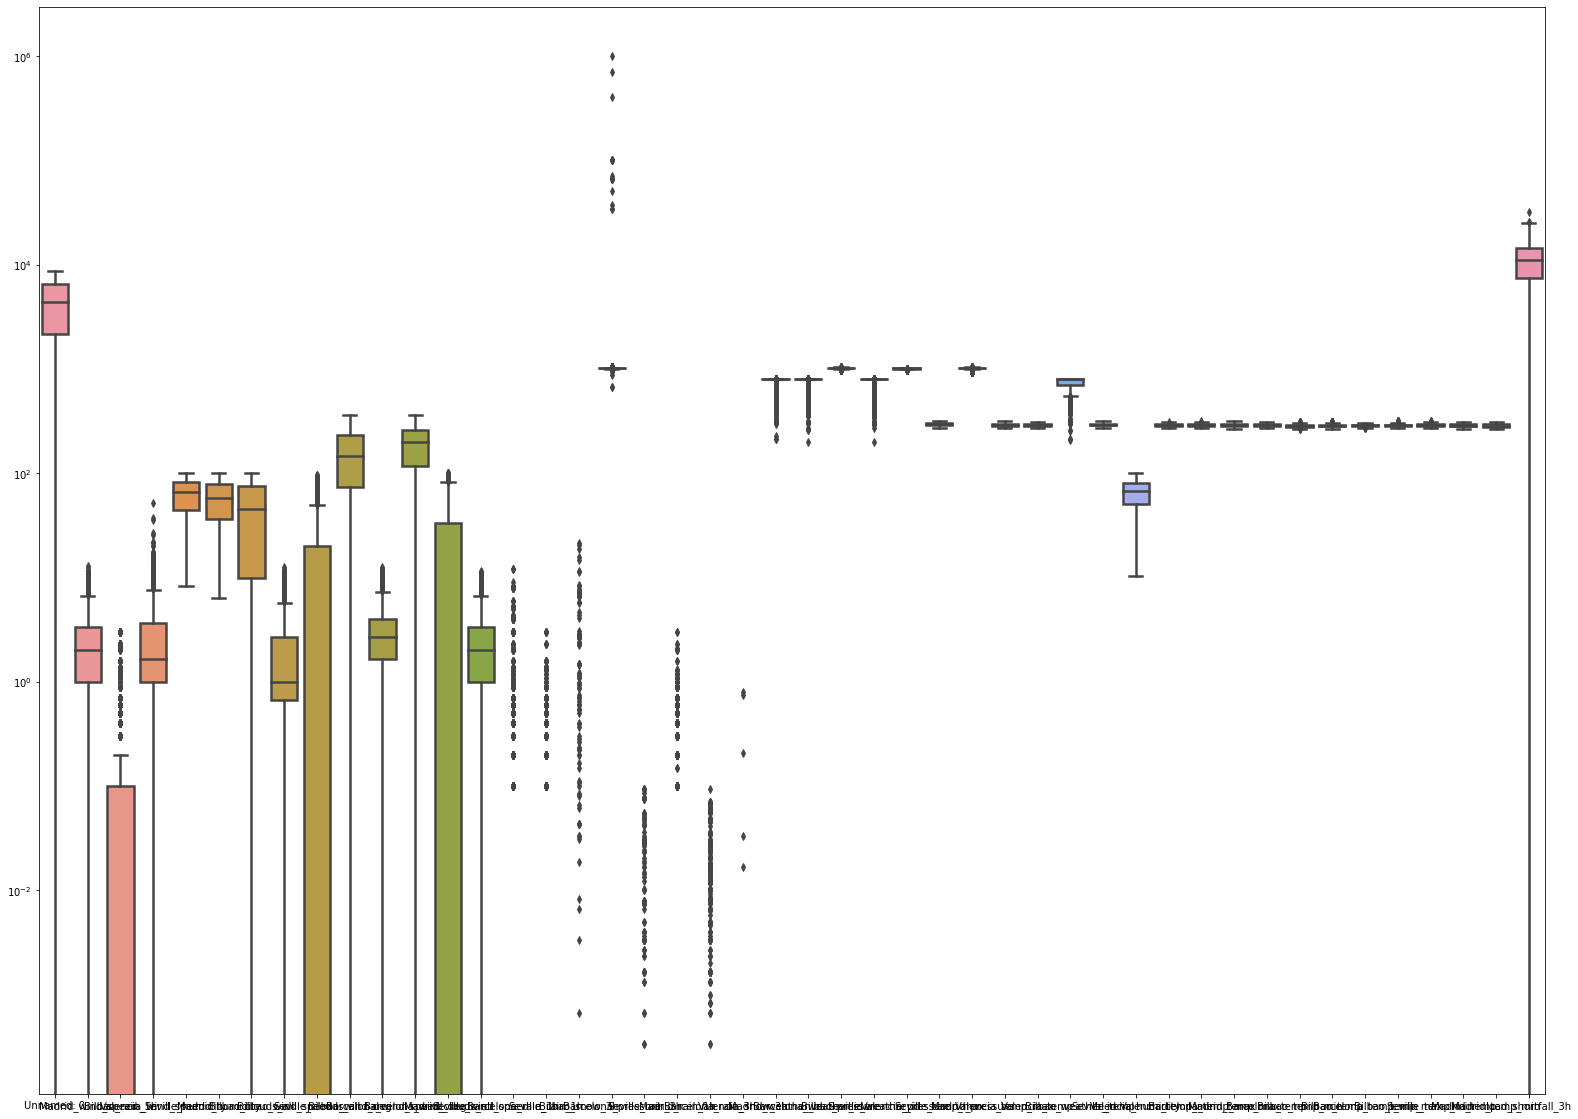

In [ ]:
a4_dims = (27, 20)
fig, ax = plt.subplots(figsize=a4_dims)
g = sns.boxplot(data=df,linewidth=2.5,ax=ax)
g.set_yscale("log")

In [ ]:
### Convert time column to datetime
df['time']= pd.to_datetime(df['time'])
df_test['time']= pd.to_datetime(df_test['time'])

In [ ]:
df['month'] = df['time'].dt.month
df_test['month'] = df_test['time'].dt.month

In [ ]:
df = df.set_index('time')
df_test = df_test.set_index('time')

Checking Null Values

In [ ]:
round((df.isnull().sum()/df.shape[0])
      *100,2).astype(str)+ ' %'

In [ ]:
df.fillna(df.groupby(df.index.month).transform('mean'), inplace = True)
df_test.fillna(df_test.groupby(df_test.index.month).transform('mean'), inplace = True)

Drop Columns

In [ ]:
### Drop useless column

df.drop('Unnamed: 0', axis=1, inplace = True)
df_test.drop('Unnamed: 0', axis=1, inplace = True)

Label Encoding Variables with text

Exploratory Analysis

In [ ]:
# look at data statistics
df.describe()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8.763000e+03,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,2.870497,190.544848,19.473392,2.425045,0.128906,0.039439,0.031912,1.377965e+03,0.000243,0.037818,0.000439,0.000205,773.527594,765.979687,1017.739549,774.658818,1012.315703,297.479527,1010.316920,291.337233,290.592152,724.722362,293.978903,65.247727,289.867648,291.157644,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,1.792197,89.077337,28.053660,1.672895,0.634730,0.175857,0.557264,1.407314e+04,0.003660,0.152639,0.003994,0.011866,77.313315,88.142235,10.046124,71.940009,8.422056,8.875812,22.198555,7.565692,7.162274,115.846537,7.920986,19.262322,6.907402,7.273538,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.706667e+02,0.000000,0.000000,0.000000,0.000000,211.000000,200.666667,971.333333,200.000000,972.666667,272.063000,927.666667,269.888000,269.888000,207.333333,272.063000,10.333333,269.888000,272.150000,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,1.666667,118.166667,0.000000,1.000000,0.000000,0.000000,0.000000,1.014000e+03,0.000000,0.000000,0.000000,0.000000,800.000000,800.000000,1013.000000,800.000000,1011.000000,291.312750,1012.333333,285.550167,285.150000,700.333333,288.282917,51.333333,284.783333,285.483333,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,2.666667,200.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.018000e+03,0.000000,0.000000,0.000000,0.000000,800.000000,800.333333,1019.000000,800.000000,1014.810870,297.101667,1017.333333,291.037000,290.176667,800.000000,293.323333,67.000000,289.550000,290.150000,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,4.000000,260.000000,33.333333,3.333333,0.000000,0.000000,0.000000,1.022000e+03,0.000000,0.000000,0.000000,0.000000,800.666667,801.000000,1024.000000,800.000000,1017.333333,304.150000,1022.000000,297.248333,296.056667,801.666667,299.620333,81.333333,294.820000,296.855000,296.816667,

In [ ]:
df.skew()

Madrid_wind_speed        1.441144
Bilbao_rain_1h           5.222802
Valencia_wind_speed      3.499637
Seville_humidity        -0.310175
Madrid_humidity         -0.057378
Bilbao_clouds_all       -0.053085
Bilbao_wind_speed        1.716914
Seville_clouds_all       1.814452
Bilbao_wind_deg          0.226927
Barcelona_wind_speed     1.057331
Barcelona_wind_deg      -0.180001
Madrid_clouds_all        1.246745
Seville_wind_speed       1.151006
Barcelona_rain_1h        8.726988
Seville_rain_1h          8.067341
Bilbao_snow_3h          26.177568
Barcelona_pressure      57.979664
Seville_rain_3h         19.342574
Madrid_rain_1h           7.074308
Barcelona_rain_3h       12.696605
Valencia_snow_3h        63.298084
Madrid_weather_id       -3.107722
Barcelona_weather_id    -2.584011
Bilbao_pressure         -0.999642
Seville_weather_id      -3.275574
Valencia_pressure       -1.967521
Seville_temp_max        -0.033931
Madrid_pressure         -1.850768
Valencia_temp_max        0.082672
Valencia_temp 

In [ ]:
df.kurtosis()

Madrid_wind_speed          2.036462
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10.710308
Valencia_pressure          3.709919
Seville_temp_max          -0.515989
Madrid_pressure            2

In [ ]:
# evaluate correlation
df.corr()

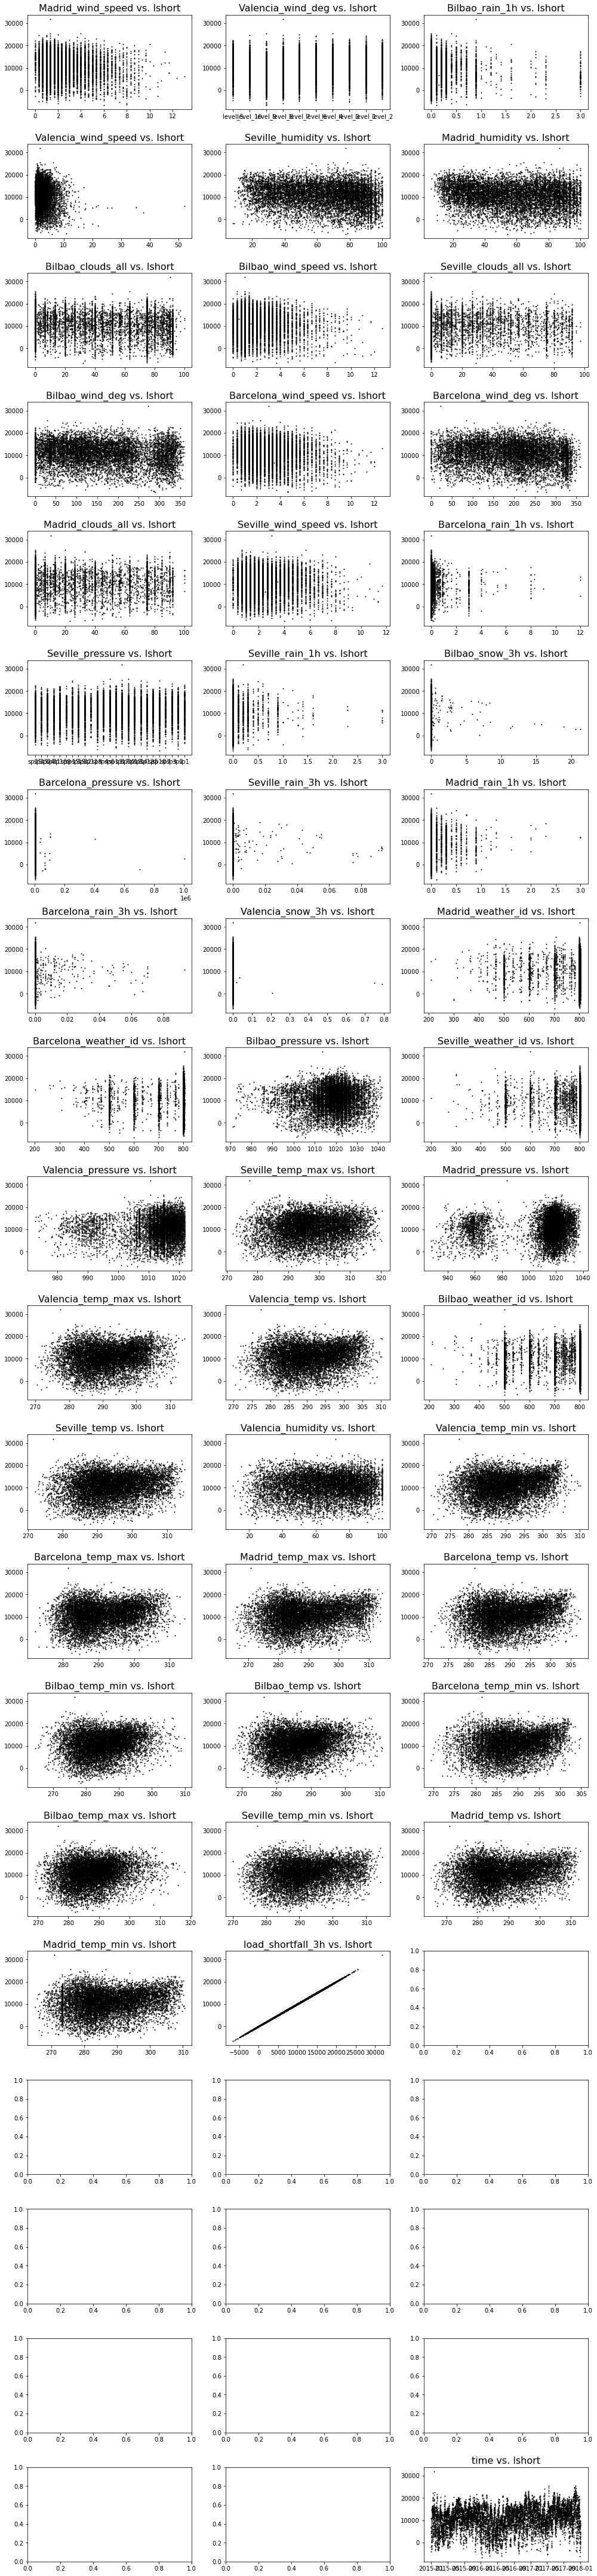

In [ ]:
# plot relevant feature interactions
fig, axs = plt.subplots(20,3, figsize=(14,60),)
fig.subplots_adjust(hspace = 0.5, wspace=.2)
axs = axs.ravel()

for index, column in enumerate(df.columns):
    axs[index-1].set_title("{} vs. lshort".format(column),fontsize=16)
    axs[index-1].scatter(x=df[column],y=df['load_shortfall_3h'], s=1, color='blue',edgecolor='k')
    
fig.tight_layout(pad=1)

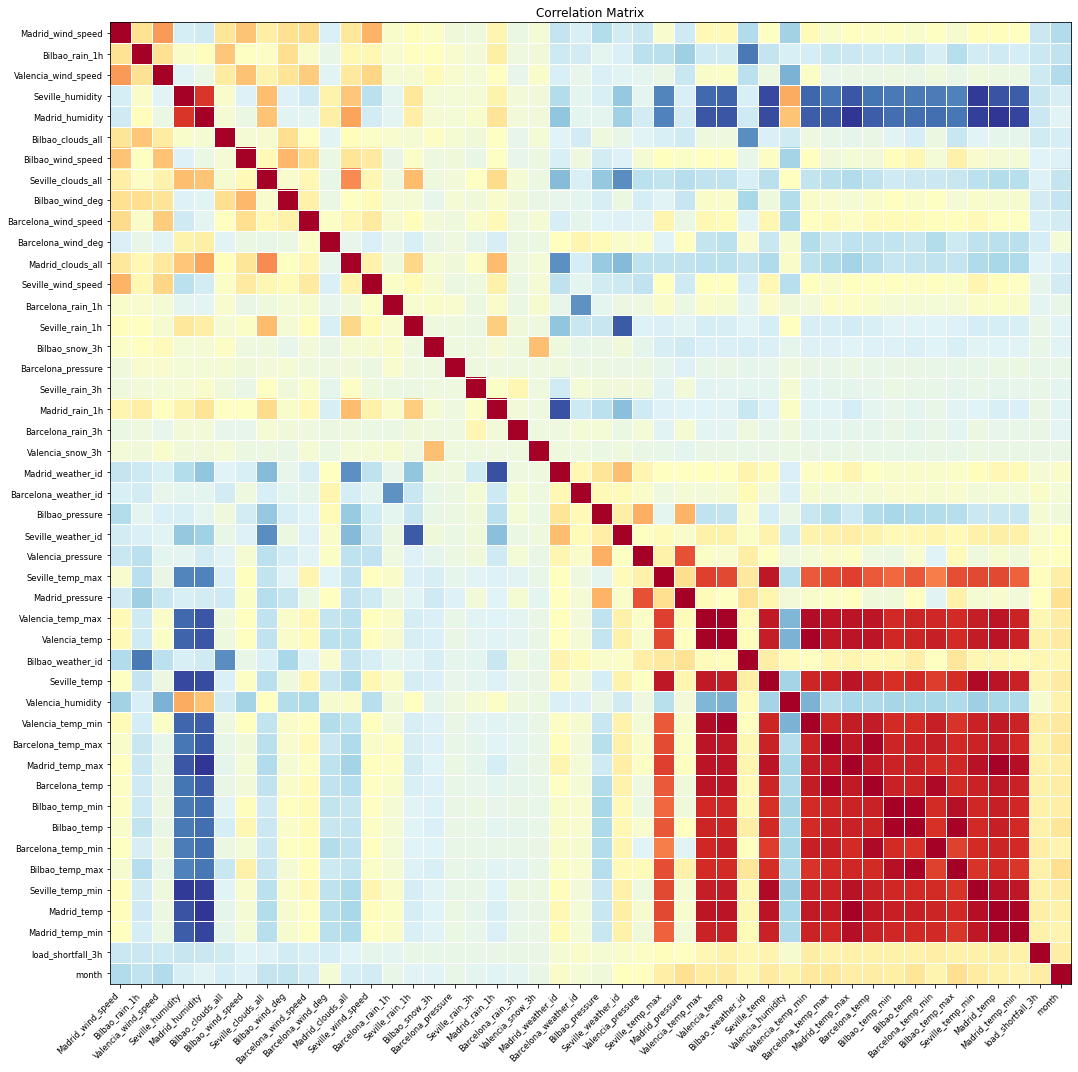

In [ ]:
from statsmodels.graphics.correlation import plot_corr

fig = plt.figure(figsize=(15,15));
ax = fig.add_subplot(111);
plot_corr(df.corr(), xnames = df.corr().columns, ax = ax);

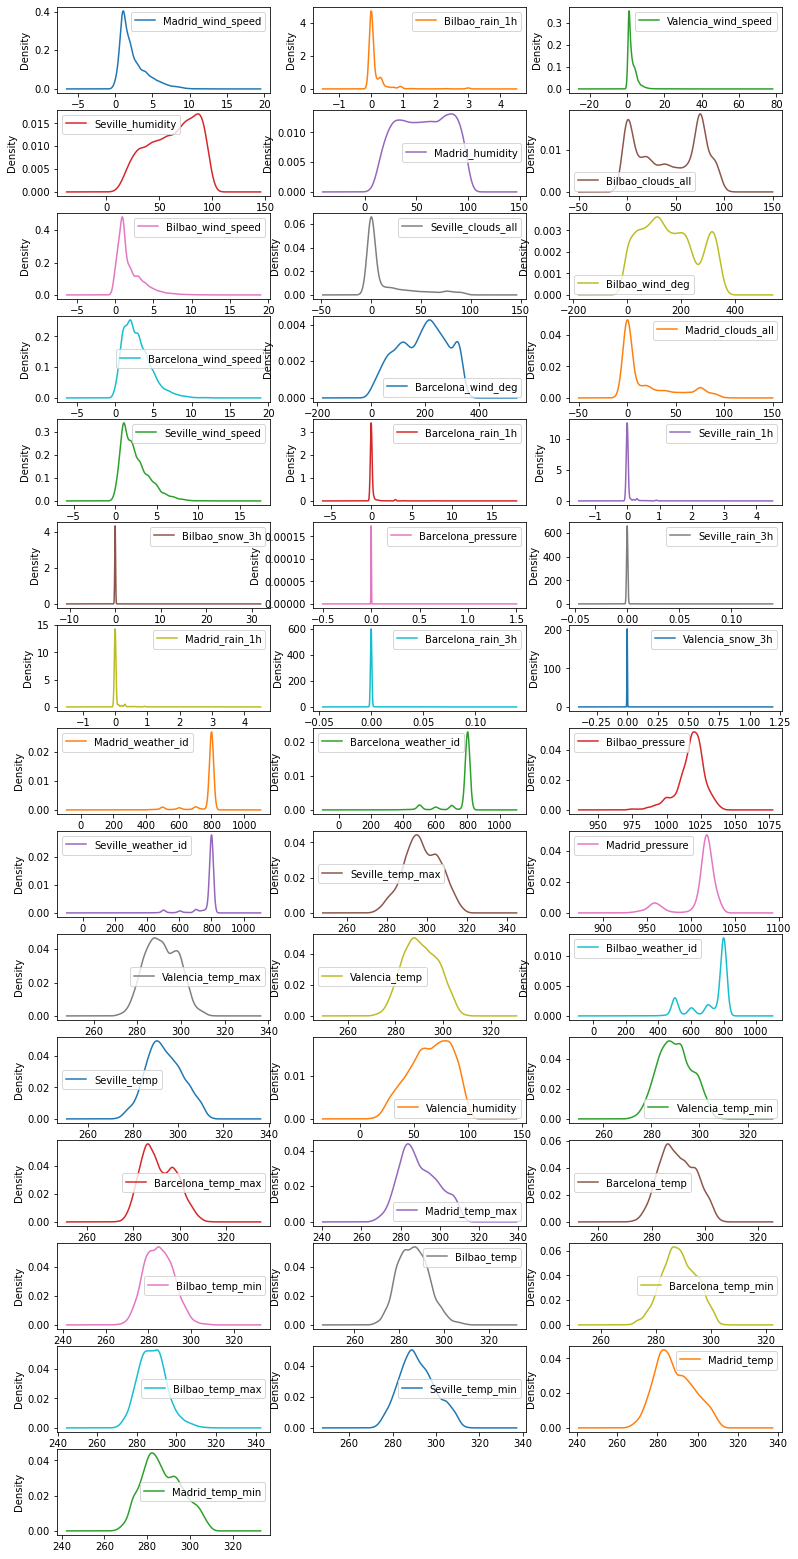

In [ ]:
# have a look at feature distributions
features = ['Madrid_wind_speed', 'Bilbao_rain_1h', 'Valencia_wind_speed',
       'Seville_humidity', 'Madrid_humidity', 'Bilbao_clouds_all',
       'Bilbao_wind_speed', 'Seville_clouds_all', 'Bilbao_wind_deg',
       'Barcelona_wind_speed', 'Barcelona_wind_deg', 'Madrid_clouds_all',
       'Seville_wind_speed', 'Barcelona_rain_1h', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure',
       'Seville_weather_id', 'Seville_temp_max', 'Madrid_pressure',
       'Valencia_temp_max', 'Valencia_temp', 'Bilbao_weather_id',
       'Seville_temp', 'Valencia_humidity', 'Valencia_temp_min',
       'Barcelona_temp_max', 'Madrid_temp_max', 'Barcelona_temp',
       'Bilbao_temp_min', 'Bilbao_temp', 'Barcelona_temp_min',
       'Bilbao_temp_max', 'Seville_temp_min', 'Madrid_temp',
       'Madrid_temp_min']
df[features].plot(kind='density', subplots=True, layout=(16, 3), sharex=False, figsize=(13, 30));

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [ ]:
# remove missing values/ features
df.drop(columns = ['Valencia_wind_deg', 'Seville_pressure'], inplace = True)
df_test.drop(columns = ['Valencia_wind_deg', 'Seville_pressure'], inplace = True)
#df.drop(columns = ['Valencia_wind_deg', 'Seville_pressure', 'Valencia_pressure'], inplace = True)
#dftest.drop(columns = ['Valencia_wind_deg', 'Seville_pressure', 'Valencia_pressure'], inplace = True)


In [ ]:
y = df['load_shortfall_3h']
X = df.drop(['load_shortfall_3h'], axis=1)


X_scaled = StandardScaler().fit_transform(X)
X_scaled_test = StandardScaler().fit_transform(df_test)

In [ ]:
# create targets and features dataset
# Separate the features from the response
y = df['load_shortfall_3h']
# X = df.drop(['load_shortfall_3h'], axis=1)
X = df[['Madrid_wind_speed', 'Bilbao_rain_1h', 'Valencia_wind_speed',
       'Seville_humidity', 'Madrid_humidity', 'Bilbao_clouds_all',
       'Bilbao_wind_speed', 'Seville_clouds_all', 'Bilbao_wind_deg',
       'Barcelona_wind_speed', 'Barcelona_wind_deg', 'Madrid_clouds_all',
       'Seville_wind_speed', 'Barcelona_rain_1h', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure',
       'Seville_weather_id', 'Seville_temp_max', 'Madrid_pressure',
       'Valencia_temp_max', 'Valencia_temp', 'Bilbao_weather_id',
       'Seville_temp', 'Valencia_humidity', 'Valencia_temp_min',
       'Barcelona_temp_max', 'Madrid_temp_max', 'Barcelona_temp',
       'Bilbao_temp_min', 'Bilbao_temp', 'Barcelona_temp_min',
       'Bilbao_temp_max', 'Seville_temp_min', 'Madrid_temp',
       'Madrid_temp_min', 'month']]


X_scaled = StandardScaler().fit_transform(X)
X_scaled_test = StandardScaler().fit_transform(df_test)

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

Split dataset into Dependent and independent variables
The first split is to split the dataset into dependent (Y) and independent variables (X).

In [ ]:
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, 
                                                    y, 
                                                    test_size=0.30,
                                                    random_state=42,
                                                    shuffle=False)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

### Lasso Regression

In [ ]:
# create one or more ML models
# Import LASSO module


# Create LASSO model object, setting alpha to 0.01
lasso = Lasso(alpha=0.01)

# Train the LASSO model
lasso.fit(X_train, y_train)


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 80548060502.43236, tolerance: 18634441.993152138
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.01)

### Ridge Regression

In [ ]:
# Import Ridge regression model

# Create ridge model
ridge = Ridge()

# Train the model
ridge.fit(X_train, y_train)

Ridge()

### Random Forest Regressor

In [ ]:
#import Random Forest Regressor


# Our forest consists of 100 trees with a max depth of 5
RF = RandomForestRegressor(n_estimators=30, max_depth=5)
RF.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, n_estimators=30)

### Decision Tree

In [ ]:
#import decision tree regressor


# Instantiate regression tree model
regr_tree = DecisionTreeRegressor(max_depth=3,random_state=42)
regr_tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

### Evaluating Models

In [ ]:
# evaluate one or more ML models

# Make training set predictions for each model
train_lasso = lasso.predict(X_train)
test_lasso = lasso.predict(X_test)

train_ridge = ridge.predict(X_train)
test_ridge = ridge.predict(X_test)

train_forest = RF.predict(X_train)
test_forest = RF.predict(X_test)


train_tree = regr_tree.predict(X_train)
test_tree = regr_tree.predict(X_test)

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>
In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. 


Comparing Model Performance

In [ ]:
# Compare model performance


# Dictionary of results
results_dict = {'Training RMSE':
                    {
                        "LASSO": metrics.mean_squared_error(y_train, train_lasso, squared=False), 
                        "RIDGE": metrics.mean_squared_error(y_train, train_ridge, squared=False),
                        "FOREST": metrics.mean_squared_error(y_train, train_forest, squared=False),
                        "D_TREE": metrics.mean_squared_error(y_train, train_tree, squared=False)
                    },
                    'Test RMSE':
                    {
                        "LASSO": metrics.mean_squared_error(y_test, test_lasso, squared=False),
                        "RIDGE": metrics.mean_squared_error(y_test, test_ridge, squared=False),
                        "FOREST": metrics.mean_squared_error(y_test, test_forest, squared=False),
                        "D_TREE": metrics.mean_squared_error(y_test, test_tree, squared=False)
                    }
                }

### Results of all the models

In [ ]:
# Create dataframe from dictionary
results_df = pd.DataFrame(data=results_dict)
# View the results
results_df

,Training RMSE,Test RMSE
LASSO,4819.537907,4775.013288
RIDGE,4819.439164,4773.395754
FOREST,4550.797041,4977.378912
D_TREE,4893.286577,5178.082188


Considering the Test Root Mean Squared Error is lowest for the Ridge Regression model, it makes the most sense that this model should be used in our shortfall predictions on unseen data. 


#### PICKLING and Submission


In [ ]:
# predictions = ridge.predict(X_scaled_test)
# submission = pd.DataFrame({'time':df.index,'load_shortfall_3h':predictions})
# submission = submission.set_index('time')


model_save_path = "modelv3.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(ridge,file)

In [ ]:
predictions = xgb.predict(X_scaled_test)
submission = pd.DataFrame({'time':df_test.index,'load_shortfall_3h':predictions})
submission = submission.set_index('time')
submission.to_csv('submission.csv',index=True)
submission

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic

In trying to explain how our ridge regression model works, it is important to note that certain predictor variables are more important than others regarding predictive capability. As a result, variables may either be dropped altogether, or may be weighted according to how much they contribute to a prediction. The ridge regression model works to minimise the impact of low-predictive ability variables by scaling them using a penalty function. That penalty function or 'term', as its known, is applied to each term and allows shrinkage of the effect of variables with high variance. Additionally, our model does suffer from issues of multicollinearity, meaning that variables are autocorrelated to each other. This poses an issue to regression modelling. Fortunately, due to its ability to shrink the effect of predictors, ridge regression is able help mitigate any multicollinearity issues we have faced. 